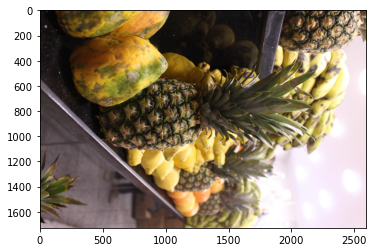

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

image_path = "img.jpg"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [38]:
import cv2 as cv
import numpy as np
import os
def filter_color(img, color, output_path):
    hsv_dict = {'red': ([140,100,50],[180,255,255]), 'blue': ([80, 168, 166],[120,255,255]),
                'green':([25,10,50], [60,255,255])}

    lower = np.array(hsv_dict[color][0])
    upper = np.array(hsv_dict[color][1])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    mask_inv = cv2.bitwise_not(mask)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res = cv2.bitwise_and(img, img, mask=mask)
    background = cv2.bitwise_and(gray, gray, mask=mask_inv)
    background = np.stack((background,)*3, axis=-1)
    added_img = cv2.add(res, background)
    cv2.imwrite(output_path, added_img)

In [39]:
img = cv2.imread('img.jpg')
ou = cv2.imread('grayimg.jpg')
output_path = 'grayimg.jpg'
filter_color(img, 'green', output_path)
result_img = cv2.imread(output_path)

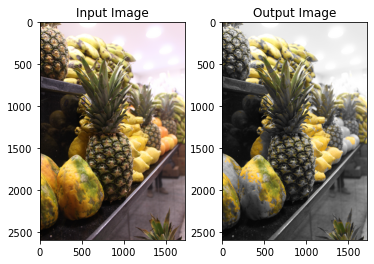

In [40]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ou, cv2.COLOR_BGR2RGB))
plt.title('Output Image')

plt.show()


In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_hue_histogram(img):
    # Convert the input image to the HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Extract the Hue channel
    hue_channel = hsv_img[:, :, 0]

    # Flatten the Hue channel to a 1D array
    hue_values = hue_channel.flatten()

    # Plot a histogram of the Hue values
    plt.hist(hue_values, bins=180, range=[0, 180])

    # Set the plot title and labels
    plt.title('Hue Histogram')
    plt.xlabel('Hue')
    plt.ylabel('Pixel Count')
    plt.show()

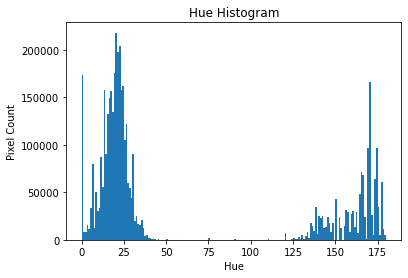

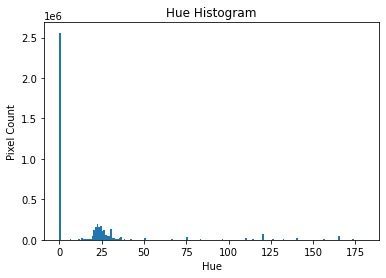

In [42]:

# Plot the Hue histogram for the original image
plot_hue_histogram(img)




# Plot the Hue histogram for the result image
plot_hue_histogram(ou)